In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

batch_size: 2
checkpoint_dir: ./experiments\unet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: unet_kittiroad
image_size:
- 320
- 480
learning_rate: 0.00023949513325777832
max_to_keep: 5
num_epochs: 2
num_iter_per_epoch: 100
summary_dir: ./experiments\unet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


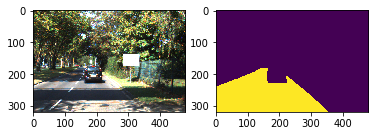

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("all_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [ ]:
sess = tf.Session()
model = UNetModel(config)
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:37<00:00,  1.54s/it]


-->Last epoch loss     :  0.41234955
-->Last epoch accuracy :  0.28737134
-->Last test loss     :  0.23635206
-->Last test accuracy :  0.4345236
Saving model...
Model saved
Epoch  1


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [02:21<00:10,  1.51s/it]

In [ ]:
test = [data.get_data_element("all_data",i) for i in range(20)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)